<a href="https://colab.research.google.com/github/Jalpapatel12/devnet-practice/blob/master/ANN_Regression_Medical_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_data = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Data Manipulation

In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Data Pre-Processing : Label Encoder

In [ ]:
insurance_data['sex'].drop_duplicates()

0    female
1      male
Name: sex, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Training label encoder
le.fit(insurance_data['sex'].drop_duplicates())

LabelEncoder()

In [ ]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [ ]:
# Training label encoder
le.fit(insurance_data['smoker'].drop_duplicates())

LabelEncoder()

In [ ]:
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [ ]:
# Training label encoder
le.fit(insurance_data['region'].drop_duplicates())

LabelEncoder()

In [ ]:
insurance_data['region'] = le.transform(insurance_data['region'])

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##### Check for Charges Distribution ?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


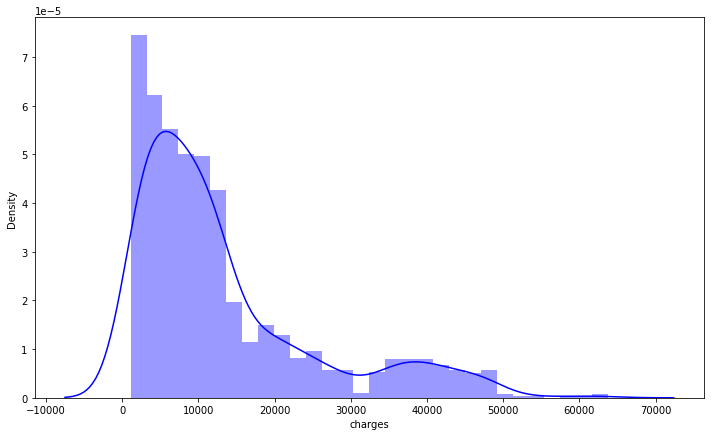

In [ ]:
plt.figure(figsize = (12,7))
sns.distplot(insurance_data['charges'], color = 'b')
plt.show()

##### Box-Whisker Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


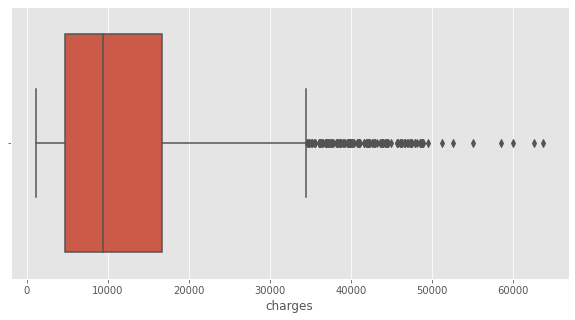

In [ ]:
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
sns.boxplot(insurance_data['charges'])
plt.show()

##### Handling Outliers

In [ ]:
from scipy import stats
insurance_data[np.abs(stats.zscore(insurance_data))['charges'] > 3].index

Int64Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [ ]:
insurance_data1 = insurance_data.drop(insurance_data[np.abs(stats.zscore(insurance_data))['charges'] > 3].index)

##### Correlation
    * Feature Selection

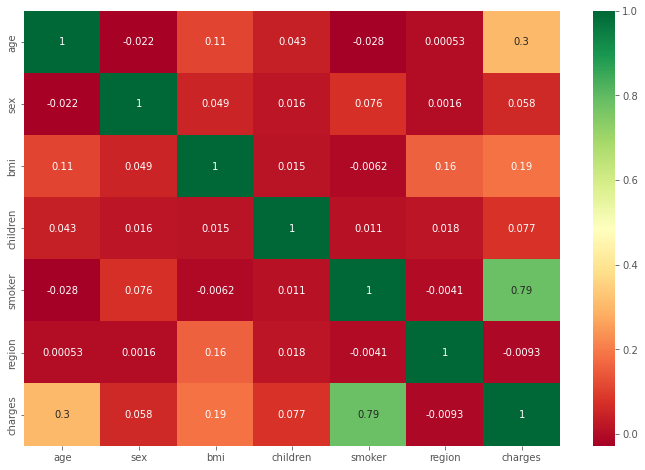

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(insurance_data1.corr(), annot = True, cmap = 'RdYlGn')

##### Split Data into Train & Test

In [ ]:
X = insurance_data1.drop('charges', axis = 1)
Y = insurance_data1['charges']

##### Cross-validation 

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train & test (80%-20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Dense Neural Network
from tensorflow.keras.layers import Dense
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Regression Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Num of Neurons (2*pow(n)), input shape = Num of Features
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())]))
    # Hidden Layer - I
    model.add(Dense(units = 256, activation = 'relu'))
    # Hidden Layer - II
    model.add(Dense(units = 512, activation = 'relu'))
    # Output Layer - Linear/Identity activation function
    model.add(Dense(units = 1))
    # Optimizers
    optimizers = RMSprop(learning_rate = 0.001)
    # Model Compiler
    model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics=['mean_squared_error',
                                                                                'mean_absolute_error'])
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               896       
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X.shape[1] * 128 + 128

896

In [ ]:
# epochs = No. of iterations , batch_size = small batches size
# validation_split = validating/testing model performance after each epoch
history = model.fit(x_train, y_train, epochs=600, batch_size=30, validation_split=0.2)

Epoch 1/600
29/29 [==============================] - 1s 12ms/step - loss: 271047680.0000 - mean_squared_error: 271047680.0000 - mean_absolute_error: 11520.5625 - val_loss: 145893984.0000 - val_mean_squared_error: 145893984.0000 - val_mean_absolute_error: 7143.2036
Epoch 2/600
29/29 [==============================] - 0s 5ms/step - loss: 143920288.0000 - mean_squared_error: 143920288.0000 - mean_absolute_error: 8198.0264 - val_loss: 99268840.0000 - val_mean_squared_error: 99268840.0000 - val_mean_absolute_error: 7928.8901
Epoch 3/600
29/29 [==============================] - 0s 5ms/step - loss: 126324008.0000 - mean_squared_error: 126324008.0000 - mean_absolute_error: 9076.3604 - val_loss: 98492416.0000 - val_mean_squared_error: 98492416.0000 - val_mean_absolute_error: 7503.4390
Epoch 4/600
29/29 [==============================] - 0s 5ms/step - loss: 126823856.0000 - mean_squared_error: 126823856.0000 - mean_absolute_error: 8921.8271 - val_loss: 102147088.0000 - val_mean_squared_error: 10

In [ ]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,271047680.0,271047680.0,11520.562500,145893984.0,145893984.0,7143.203613
1,143920288.0,143920288.0,8198.026367,99268840.0,99268840.0,7928.890137
2,126324008.0,126324008.0,9076.360352,98492416.0,98492416.0,7503.438965
3,126823856.0,126823856.0,8921.827148,102147088.0,102147088.0,8595.527344
4,125719672.0,125719672.0,9051.540039,100994072.0,100994072.0,8461.476562
...,...,...,...,...,...,...
595,19585758.0,19585758.0,2549.774414,21410148.0,21410148.0,2694.969238
596,18976990.0,18976990.0,2541.905762,23840730.0,23840730.0,3321.973389
597,19591776.0,19591776.0,2642.468018,21831582.0,21831582.0,2170.070312
598,19235960.0,19235960.0,2563.769043,22071030.0,22071030.0,2870.786133


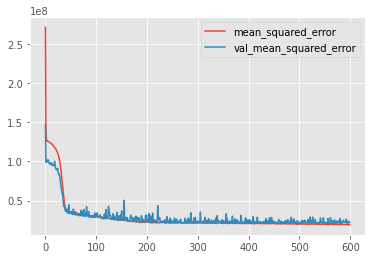

In [ ]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

##### Predictions

In [ ]:
# Yhat
predictions = model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8476371223079374

##### Predicting New Samples

In [ ]:
x_train

,age,sex,bmi,children,smoker,region
569,48,1,40.565,2,1,1
1278,39,1,29.925,1,1,0
50,18,0,35.625,0,0,0
592,20,1,31.130,2,0,2
1109,45,1,20.350,3,0,2
...,...,...,...,...,...,...
766,47,1,32.300,1,0,3
839,59,0,31.350,0,0,1
1221,40,1,24.970,2,0,2
561,54,0,32.680,0,0,0


In [ ]:
x_new = [[38,	1,	40.565,	2,	1,	1]]

In [ ]:
np.round(model.predict(x_new))

1/1 [==============================] - 0s 63ms/step


array([[39019.]], dtype=float32)